In [42]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [43]:
file_path = "controversial_users_comments.json"

with open(file_path, "r") as file:
    data = json.load(file)

In [44]:
for comment in data:
  try:
    comment['timestamp'] = datetime.utcfromtimestamp(float(comment['timestamp'])).strftime('%Y-%m-%d')
  except:
    pass

In [45]:
print("Total number of controversial comments : {0}".format(len(data)))

Total number of controversial comments : 198879


In [46]:
day_wise_comment_counts = {}
for comment in data:
  if comment['timestamp'] in day_wise_comment_counts:
    day_wise_comment_counts[comment['timestamp']] += 1
  else:
    day_wise_comment_counts[comment['timestamp']] = 1

In [47]:
day_wise_comment_counts = dict(sorted(day_wise_comment_counts.items(), key=lambda x: x[0]))

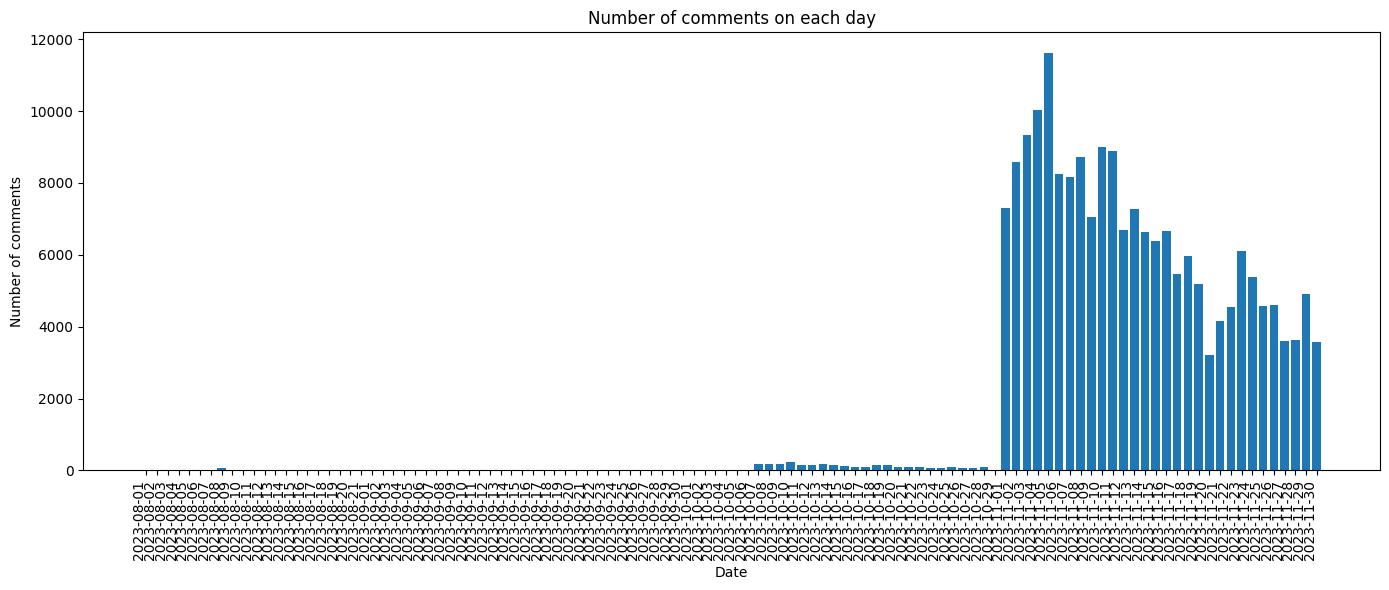

In [48]:
date = list(day_wise_comment_counts.keys())
number_of_Comments = list(day_wise_comment_counts.values())

plt.figure(figsize=(14, 6))
plt.bar(date[:], number_of_Comments[:])
plt.xlabel("Date")
plt.ylabel("Number of comments")
plt.title("Number of comments on each day")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

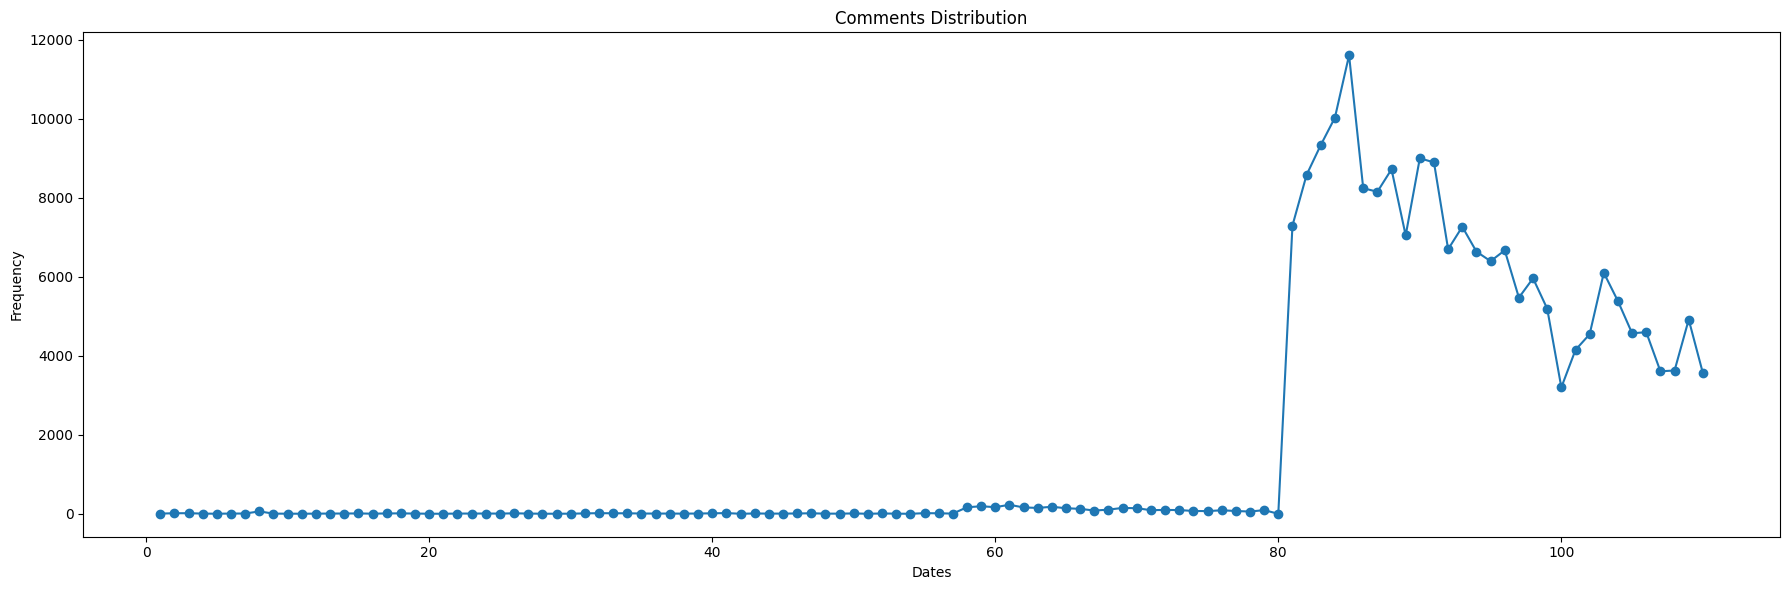

In [49]:
# each word is assigned a number for clear visualization
key_nums = list(range(1, len(number_of_Comments) + 1))
plt.figure(figsize=(18, 6))
plt.plot(key_nums, number_of_Comments[:], marker='o')
plt.xlabel("Dates")
plt.ylabel("Frequency")
plt.title("Comments Distribution")
plt.tight_layout()
plt.show()

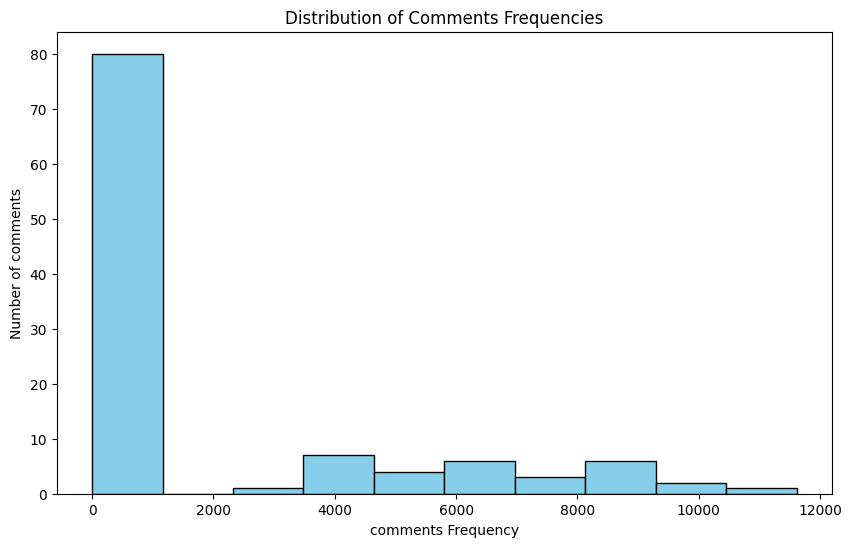

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(number_of_Comments, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Comments Frequencies")
plt.xlabel("comments Frequency")
plt.ylabel("Number of comments")
plt.show()

In [51]:
months = {'8': 0, '9':0, '10': 0, '11':0}

In [52]:
for comment in data:
  month = str(int(comment['timestamp'].split('-')[1]))
  if month in months:
    months[month] += 1

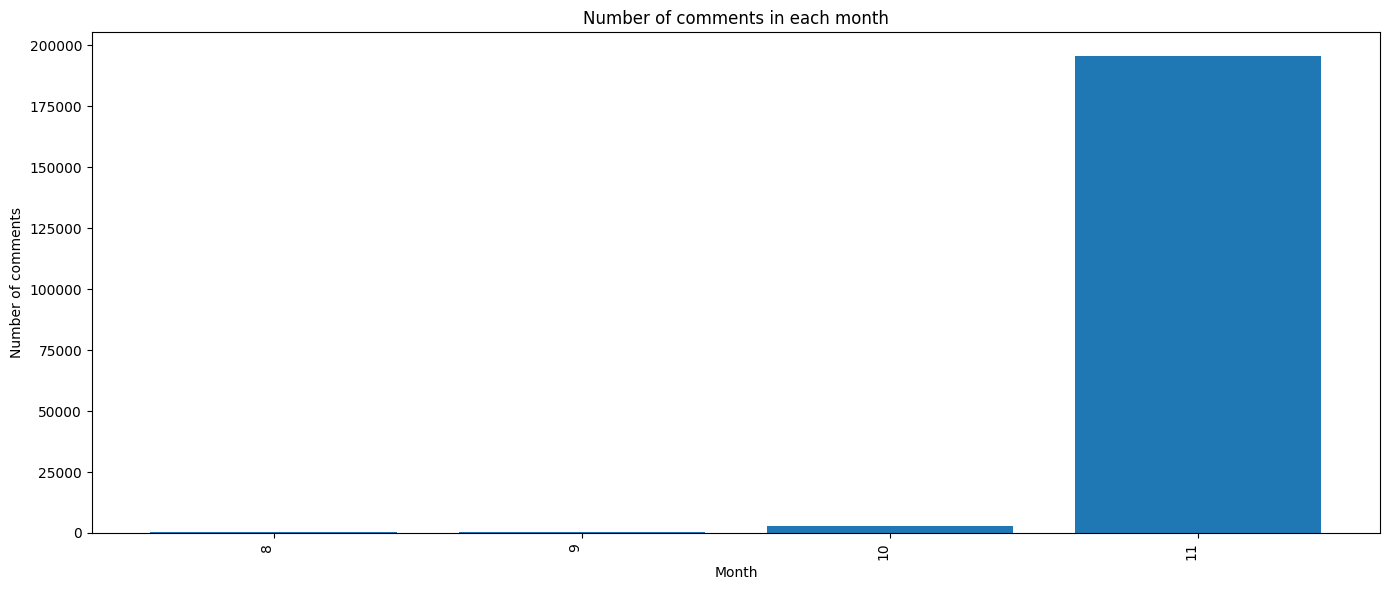

In [53]:
month = list(months.keys())
number_of_Comments = list(months.values())

plt.figure(figsize=(14, 6))
plt.bar(month, number_of_Comments)
plt.xlabel("Month")
plt.ylabel("Number of comments")
plt.title("Number of comments in each month")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

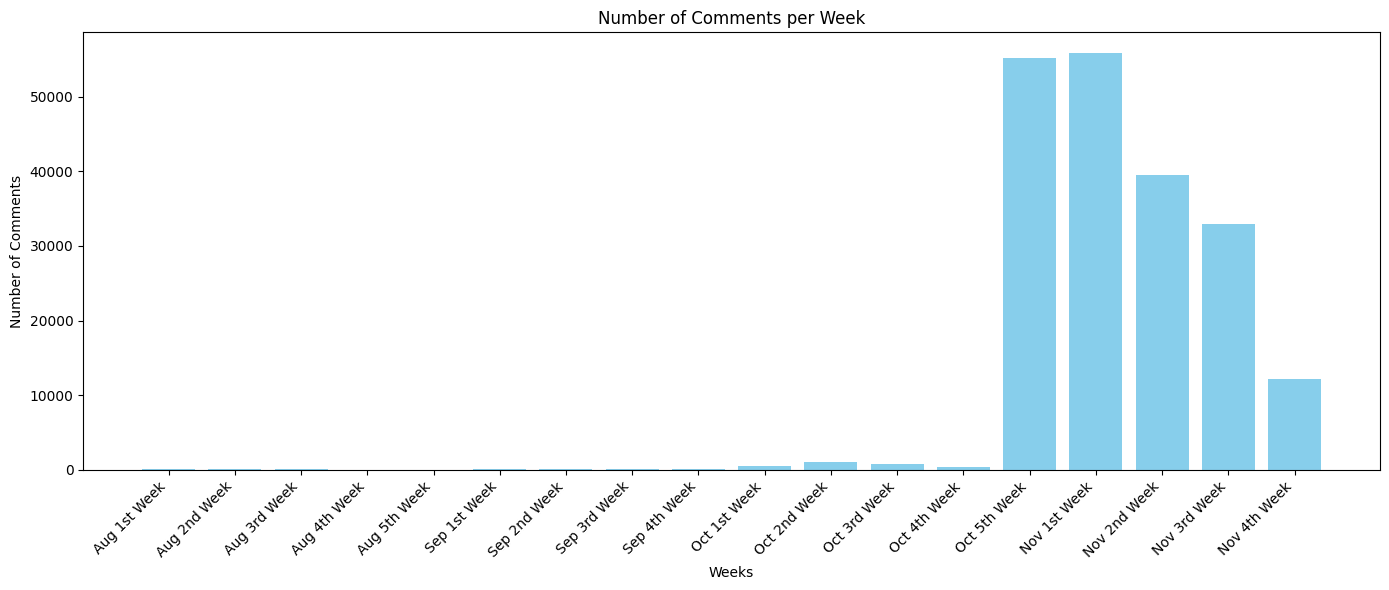

In [54]:
# Generate week-wise bins starting from the earliest date
start_date = datetime.strptime('2023-08-01', '%Y-%m-%d')
end_date = max(datetime.strptime(comment['timestamp'], '%Y-%m-%d') for comment in data)

weeks = []
week_labels = []

current_date = start_date
week_count = 1
while current_date <= end_date:
    # Create week labels like "Aug 1st Week"
    week_start = current_date
    week_end = current_date + timedelta(days=6)
    month = week_start.strftime('%b')
    if week_count == 1:
        suffix = "st"
    elif week_count == 2:
        suffix = "nd"
    elif week_count == 3:
        suffix = "rd"
    else:
        suffix = "th"
    week_label = f"{month} {week_count}{suffix} Week"
    week_labels.append(week_label)
    weeks.append((week_start, week_end))
    current_date += timedelta(days=7)
    if current_date.month != week_start.month:
        week_count = 1
    else:
        week_count += 1

# Count comments per week
week_comment_counts = {label: 0 for label in week_labels}
for comment in data:
    comment_date = datetime.strptime(comment['timestamp'], '%Y-%m-%d')
    for i, (start, end) in enumerate(weeks):
        if start <= comment_date <= end:
            week_comment_counts[week_labels[i]] += 1
            break

# Prepare data for plotting
labels = list(week_comment_counts.keys())
values = list(week_comment_counts.values())

# Plotting the results
plt.figure(figsize=(14, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel("Weeks")
plt.ylabel("Number of Comments")
plt.title("Number of Comments per Week")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [55]:
data = week_comment_counts

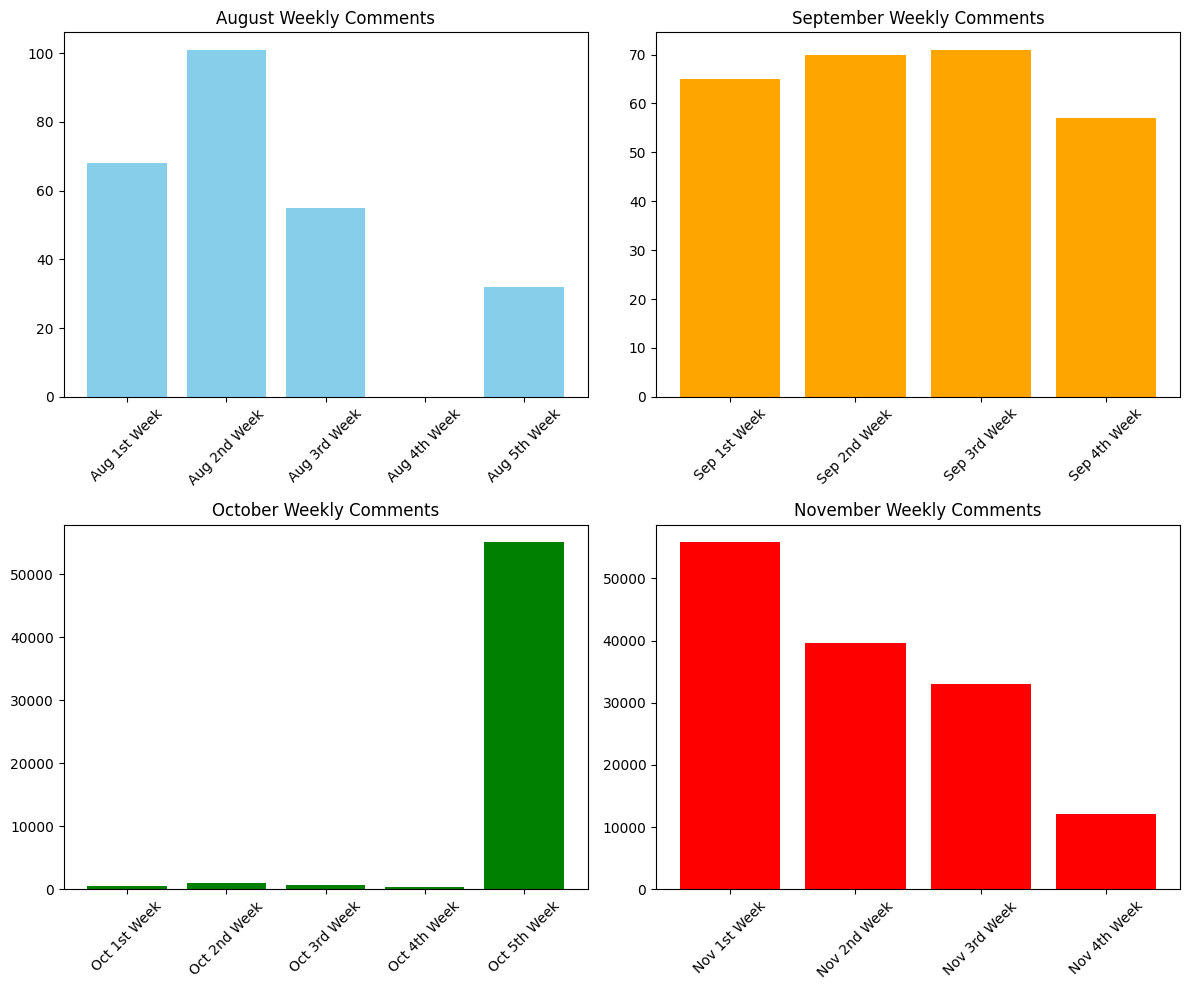

In [56]:
august_data = {key: value for key, value in data.items() if key.startswith("Aug")}
september_data = {key: value for key, value in data.items() if key.startswith("Sep")}
october_data = {key: value for key, value in data.items() if key.startswith("Oct")}
november_data = {key: value for key, value in data.items() if key.startswith("Nov")}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(august_data.keys(), august_data.values(), color='skyblue')
axs[0, 0].set_title("August Weekly Comments")
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(september_data.keys(), september_data.values(), color='orange')
axs[0, 1].set_title("September Weekly Comments")
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(october_data.keys(), october_data.values(), color='green')
axs[1, 0].set_title("October Weekly Comments")
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(november_data.keys(), november_data.values(), color='red')
axs[1, 1].set_title("November Weekly Comments")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()